In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

# Load dataset
iris = pd.read_csv("iris (1) (1).csv")

# Features and labels
X = iris.iloc[:, :-1]  # assuming last column is target
y = iris.iloc[:, -1]

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Kernel SVM
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train, y_train)
y_pred_linear = svm_linear.predict(X_test)

print("Linear Kernel SVM:")
print("Accuracy:", accuracy_score(y_test, y_pred_linear))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_linear))

# RBF Kernel SVM
svm_rbf = SVC(kernel='rbf')
svm_rbf.fit(X_train, y_train)
y_pred_rbf = svm_rbf.predict(X_test)

print("\nRBF Kernel SVM:")
print("Accuracy:", accuracy_score(y_test, y_pred_rbf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rbf))


Linear Kernel SVM:
Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

RBF Kernel SVM:
Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]



Letter Recognition SVM Classifier:
Accuracy: 0.74325
Confusion Matrix:
 [[149   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [ 49 104   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [ 30   0 103   0   0   0   1   0   0   0   2   0   0   0   1   0   0   0
    0   0   0   0   0   0   0   0]
 [ 43   0   0 113   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [ 90   0   0   0  51   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0]
 [ 42   0   0   0   0  97   0   0   0   0   0   0   0   0   0   0   0   0
    0   1   0   0   0   0   0   0]
 [ 71   0   0   0   0   0  87   0   0   0   0   0   0   0   0   0   0   2
    0   0   0   0   0   0   0   0]
 [105   0   0   2   0   0   0  33   0   0   0   0   0   0   0   0   0   4
    0   0   0   0   0   0   0   0]
 [ 21   0   0   0   0   0   0   0 122   0   0   0   0  

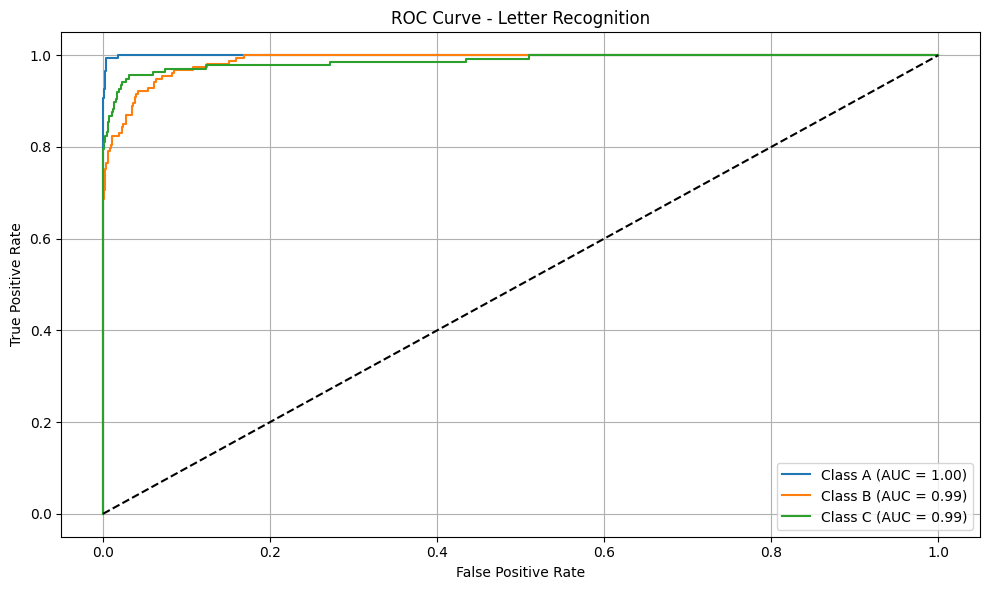

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier

# Load dataset
letters = pd.read_csv("letter-recognition.csv")  # assuming this contains letter recognition data

# Features and labels
X = letters.iloc[:, 1:]  # assuming first column is label
y = letters.iloc[:, 0]

# Binarize the output for ROC
lb = LabelBinarizer()
y_bin = lb.fit_transform(y)

# Train-test split
X_train, X_test, y_train_bin, y_test_bin = train_test_split(X, y_bin, test_size=0.2, random_state=42)
y_train = lb.inverse_transform(y_train_bin)
y_test = lb.inverse_transform(y_test_bin)

# One-vs-Rest SVM with RBF kernel for multiclass ROC
svm_model = OneVsRestClassifier(SVC(kernel='rbf', probability=True))
svm_model.fit(X_train, y_train_bin)
y_score = svm_model.decision_function(X_test)

# Accuracy and confusion matrix
y_pred = lb.inverse_transform(svm_model.predict(X_test))
print("\nLetter Recognition SVM Classifier:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# ROC Curve and AUC
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(lb.classes_)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for first 3 classes only (to avoid clutter)
plt.figure(figsize=(10, 6))
for i in range(3):
    plt.plot(fpr[i], tpr[i], label=f'Class {lb.classes_[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # diagonal
plt.title('ROC Curve - Letter Recognition')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(True)
plt.tight_layout()
plt.show()
